In [62]:
# Statistical Packages
import numpy as np 
import pandas as pd 

# Text Blob and nltk
from textblob import TextBlob
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from bs4 import BeautifulSoup
import re

# Packages required for Neural Networks 
from keras.utils import to_categorical
import random
from sklearn.model_selection import train_test_split
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer
from keras.layers import Dense,Dropout,Embedding,LSTM
from keras.callbacks import EarlyStopping
from keras.layers import Dense, Flatten, LSTM, Conv1D, MaxPooling1D, Dropout, Activation
from keras.losses import categorical_crossentropy
from keras.optimizers import Adam
from keras.models import Sequential
from tqdm import tqdm
import warnings
from keras.preprocessing.sequence import pad_sequences
warnings.filterwarnings("ignore", category=UserWarning, module='bs4')
lemmatizer = WordNetLemmatizer()

# Packages Required for Logistic Regression 
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics import roc_curve, confusion_matrix, accuracy_score
from sklearn.metrics import accuracy_score, roc_auc_score , f1_score
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer
import string
from sklearn.linear_model import LogisticRegression

import matplotlib.pyplot as plt

#set random seed for the session and also for tensorflow that runs in background for keras
# set_random_seed(123)
# random.seed(123)


In [2]:
df_train = pd.read_csv("C:/MITA Spring 19/Turkoz/Capstone/Drug_Dataset/train_raw/train_csv.csv")
df_test = pd.read_csv("C:/MITA Spring 19/Turkoz/Capstone/Drug_Dataset/test_raw/test_raw.csv")

In [3]:
print("Shape of the training data- ",df_train.shape)
print("Shape of the testing data- ",df_test.shape)

Shape of the training data-  (161297, 7)
Shape of the testing data-  (53766, 7)


In [4]:
##### Columns present in the testing dataset
df_train.columns

Index(['uniqueID', 'drugName', 'condition', 'review', 'rating', 'date',
       'usefulCount'],
      dtype='object')

In [5]:

######### Displaying how the reviews look like
df_train['review'].head(5)

0    "It has no side effect, I take it in combinati...
1    "My son is halfway through his fourth week of ...
2    "I used to take another oral contraceptive, wh...
3    "This is my first time using any form of birth...
4    "Suboxone has completely turned my life around...
Name: review, dtype: object

In [6]:
df_train['sentiment'] = df_train['rating'].apply(lambda x: 1 if x>5 else 0)
df_test['sentiment'] = df_test['rating'].apply(lambda x: 1 if x>5 else 0)

In [7]:
reviews = df_train['review']
sentiments = []
for review in tqdm(reviews):
    blob = TextBlob(review)
    sentiments += [blob.sentiment.polarity]

100%|██████████| 161297/161297 [02:19<00:00, 1159.41it/s]


In [8]:
df_train["sentiment"] = sentiments
df_train.head(5)

,uniqueID,drugName,condition,review,rating,date,usefulCount,sentiment
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27,0.000000
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192,0.168333
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17,0.067210
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10,0.179545
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37,0.194444


In [9]:
row_indexes1=df_train[df_train['rating']>=5.0].index
df_train.loc[row_indexes1,'rating_new']="1"
row_indexes0=df_train[df_train['rating']<5.0].index
df_train.loc[row_indexes0,'rating_new']="0"

In [10]:
row_indexes1=df_test[df_test['rating']>=5.0].index
df_test.loc[row_indexes1,'rating_new']="1"
row_indexes0=df_test[df_test['rating']<5.0].index
df_test.loc[row_indexes0,'rating_new']="0"

In [11]:
df_train['sentiment'] = df_train['rating'].apply(lambda i:1 if i>=5 else 0)
df_test['sentiment'] = df_test['rating'].apply(lambda i:1 if i>=5 else 0)

In [12]:
df_train.head(5)

,uniqueID,drugName,condition,review,rating,date,usefulCount,sentiment,rating_new
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27,1,1
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192,1,1
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17,1,1
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10,1,1
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37,1,1


In [13]:
df_test.head(5)

,uniqueID,drugName,condition,review,rating,date,usefulCount,sentiment,rating_new
0,163740,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10,28-Feb-12,22,1,1
1,206473,Mesalamine,"Crohn's Disease, Maintenance","""My son has Crohn&#039;s disease and has done ...",8,17-May-09,17,1,1
2,159672,Bactrim,Urinary Tract Infection,"""Quick reduction of symptoms""",9,29-Sep-17,3,1,1
3,39293,Contrave,Weight Loss,"""Contrave combines drugs that were used for al...",9,5-Mar-17,35,1,1
4,97768,Cyclafem 1 / 35,Birth Control,"""I have been on this birth control for one cyc...",9,22-Oct-15,4,1,1


In [14]:
from tqdm import tqdm

def clean_sentences(df):
    reviews = []

    for sent in tqdm(df['review']):
        
        #remove html content
        review_text = BeautifulSoup(sent).get_text()
            
        #remove non-alphabetic characters
        review_text = re.sub("[^a-zA-Z]"," ", review_text)
    
        #tokenize the sentences
        words = word_tokenize(review_text.lower())
    
        #lemmatize each word to its lemma
        lemma_words = [lemmatizer.lemmatize(i) for i in words]
    
        reviews.append(lemma_words)

    return(reviews)

In [15]:

df_train['tokens'] = clean_sentences(df_train)
df_test['tokens'] = clean_sentences(df_test)

100%|██████████| 53766/53766 [01:02<00:00, 856.23it/s] 


In [16]:

from nltk.corpus import stopwords
stopword = stopwords.words('english')
negated_words = ['don',"don't",'ain','aren',"aren't",'couldn',"couldn't",
                 'didn',"didn't",'doesn',"doesn't",'hadn',"hadn't",'hasn',"hasn't",'haven',"haven't",'isn',"isn't",
                'against','no','not','no','mightn',"mightn't",'mustn',"mustn't",'needn',"needn't",'shan',"shan't",'shouldn',
                 "shouldn't",'wasn',"wasn't",'weren',"weren't",'won',"won't",'wouldn',"wouldn't"]
stop = []
for w in stopword:
    if w not in negated_words:
        stop.append(w)

In [17]:
def clean(sen):
    return [word for word in sen if word not in stop]

In [18]:

df_train['cleaned']= df_train['tokens'].apply(clean)
df_test['cleaned'] = df_test['tokens'].apply(clean)

In [19]:

df_train.head(5)

,uniqueID,drugName,condition,review,rating,date,usefulCount,sentiment,rating_new,tokens,cleaned
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27,1,1,"[it, ha, no, side, effect, i, take, it, in, co...","[ha, no, side, effect, take, combination, byst..."
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192,1,1,"[my, son, is, halfway, through, his, fourth, w...","[son, halfway, fourth, week, intuniv, became, ..."
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17,1,1,"[i, used, to, take, another, oral, contracepti...","[used, take, another, oral, contraceptive, pil..."
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10,1,1,"[this, is, my, first, time, using, any, form, ...","[first, time, using, form, birth, control, gla..."
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37,1,1,"[suboxone, ha, completely, turned, my, life, a...","[suboxone, ha, completely, turned, life, aroun..."


## LSTM With CNN

In [20]:
############### FOR TRAINING #################
all_training_words = [word for tokens in df_train["cleaned"] for word in tokens]
training_sentence_lengths = [len(tokens) for tokens in df_train["cleaned"]]
TRAINING_VOCAB = sorted(list(set(all_training_words)))
print("%s words total, with a vocabulary size of %s" % (len(all_training_words), len(TRAINING_VOCAB)))
print("Max sentence length is %s" % max(training_sentence_lengths))

6946645 words total, with a vocabulary size of 41914
Max sentence length is 973


In [21]:
############### FOR TESTING ##################
all_testing_words = [word for tokens in df_test["cleaned"] for word in tokens]
testing_sentence_lengths = [len(tokens) for tokens in df_test["cleaned"]]
TESTING_VOCAB = sorted(list(set(all_testing_words)))
print("%s words total, with a vocabulary size of %s" % (len(all_testing_words), len(TESTING_VOCAB)))
print("Max sentence length is %s" % max(testing_sentence_lengths))

2311711 words total, with a vocabulary size of 28119
Max sentence length is 577


In [22]:
############### FOR TRAINING #################
cleaned_2 = []
for i in df_train["cleaned"]:
    text = " ".join(i)
    cleaned_2.append(text)
df_train["cleaned_new"] = cleaned_2

In [23]:

############## FOR TESTING ##################
cleaned_2_test = []
for i in df_test["cleaned"]:
    text = " ".join(i)
    cleaned_2_test.append(text)
df_test["cleaned_new"] = cleaned_2_test
print(len(cleaned_2_test))

53766


In [24]:
df_test.head(5)

,uniqueID,drugName,condition,review,rating,date,usefulCount,sentiment,rating_new,tokens,cleaned,cleaned_new
0,163740,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10,28-Feb-12,22,1,1,"[i, ve, tried, a, few, antidepressant, over, t...","[tried, antidepressant, year, citalopram, fluo...",tried antidepressant year citalopram fluoxetin...
1,206473,Mesalamine,"Crohn's Disease, Maintenance","""My son has Crohn&#039;s disease and has done ...",8,17-May-09,17,1,1,"[my, son, ha, crohn, s, disease, and, ha, done...","[son, ha, crohn, disease, ha, done, well, asac...",son ha crohn disease ha done well asacol ha no...
2,159672,Bactrim,Urinary Tract Infection,"""Quick reduction of symptoms""",9,29-Sep-17,3,1,1,"[quick, reduction, of, symptom]","[quick, reduction, symptom]",quick reduction symptom
3,39293,Contrave,Weight Loss,"""Contrave combines drugs that were used for al...",9,5-Mar-17,35,1,1,"[contrave, combine, drug, that, were, used, fo...","[contrave, combine, drug, used, alcohol, smoki...",contrave combine drug used alcohol smoking opi...
4,97768,Cyclafem 1 / 35,Birth Control,"""I have been on this birth control for one cyc...",9,22-Oct-15,4,1,1,"[i, have, been, on, this, birth, control, for,...","[birth, control, one, cycle, reading, review, ...",birth control one cycle reading review type si...


In [25]:
tokenizer_train = Tokenizer(num_words= len(TRAINING_VOCAB), lower=True, char_level=False)
tokenizer_train.fit_on_texts(df_train['cleaned_new'].tolist())

sequences_train = tokenizer_train.texts_to_sequences(df_train['cleaned_new'].tolist())
data_train = pad_sequences(sequences_train, maxlen=max(training_sentence_lengths))

tokenizer_test = Tokenizer(num_words= len(TESTING_VOCAB), lower=True, char_level=False)
tokenizer_test.fit_on_texts(df_test['cleaned_new'].tolist())

sequences_test = tokenizer_test.texts_to_sequences(df_test['cleaned_new'].tolist())
data_test = pad_sequences(sequences_test, maxlen=max(training_sentence_lengths))



In [26]:
train_word_index = tokenizer_train.word_index
test_word_index = tokenizer_test.word_index
print('Found %s unique tokens in the traing data set.' % len(train_word_index))
print('Found %s unique tokens in the testing data set.' % len(test_word_index))
total_words = len(train_word_index)+1

Found 41914 unique tokens in the traing data set.
Found 28119 unique tokens in the testing data set.


In [27]:
print("Shape of training data",data_train.shape)
print("Shape of testing data",data_test.shape)

Shape of training data (161297, 973)
Shape of testing data (53766, 973)


In [33]:
# LSTM Model Architecture
model_lstm = Sequential()
model_lstm.add(Embedding(41914, 100, input_length=973))
model_lstm.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model_lstm.add(Dense(1, activation='sigmoid'))
model_lstm.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model_lstm.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 973, 100)          4191400   
_________________________________________________________________
lstm_4 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 101       
Total params: 4,271,901
Trainable params: 4,271,901
Non-trainable params: 0
_________________________________________________________________
None


In [34]:
train_labels = df_train["sentiment"]

In [35]:
def create_conv_model():
    model_conv = Sequential()
    model_conv.add(Embedding(41914, 100, input_length=973))
    model_conv.add(Dropout(0.2))
    model_conv.add(Conv1D(64, 5, activation='relu'))
    model_conv.add(MaxPooling1D(pool_size=4))
    model_conv.add(LSTM(100))
    model_conv.add(Dense(1, activation='sigmoid'))
    model_conv.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model_conv

In [36]:
model_conv = create_conv_model()

In [37]:
# Training the model 
#set early stopping monitor so the model stops training when it won't improve anymore
early_stopping_monitor = EarlyStopping(patience=3)
model_conv = create_conv_model()
history1 = model_conv.fit(data_train, np.array(train_labels), batch_size=100, validation_split=0.3, epochs = 3,callbacks=[early_stopping_monitor],verbose=1)




Train on 112907 samples, validate on 48390 samples
Epoch 1/3





 20400/112907 [====>.........................] - ETA: 1:10:07 - loss: 0.6994 - acc: 0.27 - ETA: 42:53 - loss: 0.6923 - acc: 0.5000 - ETA: 33:33 - loss: 0.6851 - acc: 0.58 - ETA: 29:23 - loss: 0.6782 - acc: 0.62 - ETA: 26:54 - loss: 0.6687 - acc: 0.65 - ETA: 24:58 - loss: 0.6623 - acc: 0.66 - ETA: 23:34 - loss: 0.6529 - acc: 0.68 - ETA: 22:29 - loss: 0.6499 - acc: 0.68 - ETA: 23:28 - loss: 0.6420 - acc: 0.69 - ETA: 23:30 - loss: 0.6398 - acc: 0.69 - ETA: 22:46 - loss: 0.6284 - acc: 0.70 - ETA: 22:16 - loss: 0.6139 - acc: 0.71 - ETA: 21:41 - loss: 0.6136 - acc: 0.71 - ETA: 21:09 - loss: 0.6075 - acc: 0.71 - ETA: 20:47 - loss: 0.6067 - acc: 0.71 - ETA: 20:26 - loss: 0.6037 - acc: 0.72 - ETA: 20:07 - loss: 0.5971 - acc: 0.72 - ETA: 19:52 - loss: 0.5957 - acc: 0.72 - ETA: 19:36 - loss: 0.5913 - acc: 0.73 - ETA: 19:23 - loss: 0.5882 - acc: 0.73 - ETA: 19:10 - loss: 0.5898 - acc: 0.73 - ETA: 19:02 - loss: 0.5871 - acc: 0.73 

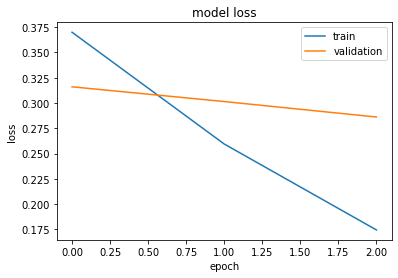

In [38]:
plt.plot(history1.history['loss'],label='train')
plt.plot(history1.history['val_loss'],label='validation')
plt.legend()
plt.title('model loss')
plt.ylabel("loss")
plt.xlabel("epoch")
plt.savefig('LSTM_model_loss.png')

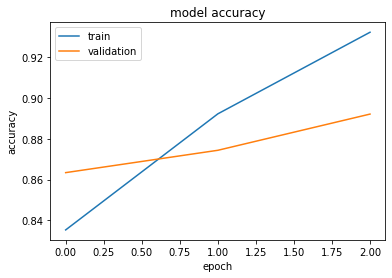

In [41]:

plt.plot(history1.history['acc'],label='train')
plt.plot(history1.history['val_acc'],label='validation')
plt.title('model accuracy')
plt.legend()
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.savefig('LSTM_model_accuracy.png')